# Encoding binary sequences

In [1]:
try:
    # in colab
    import google.colab
    print('In colab, downloading LOTlib3')
    !git clone https://github.com/piantado/LOTlib3
except:
    # not in colab
    print('Not in colab!')

Not in colab!


## Imports

First we need to import a bunch of stuff:

In [2]:
import numpy as np

In [3]:
from LOTlib3.Miscellaneous import q, random
from LOTlib3.Grammar import Grammar
from LOTlib3.DataAndObjects import FunctionData, Obj
from LOTlib3.Hypotheses.LOTHypothesis import LOTHypothesis
from LOTlib3.Hypotheses.Likelihoods.BinaryLikelihood import BinaryLikelihood
from LOTlib3.Eval import primitive
from LOTlib3.Miscellaneous import qq
from LOTlib3.TopN import TopN
from LOTlib3.Samplers.MetropolisHastings import MetropolisHastingsSampler

## The model

In the past few weeks, we have worker together through a few models in LOTlib3, but you still haven't had a chance to see how to develop a model from scratch. Therefore, this week let's try to replicate the model in Planton et al (2021) from scratch! 

The grammar is the following:

- Staying where one is (`+0`)
- Moving to the other item (denoted `b`)
- Repetition 
    - `^n`, where `n` is a number
    - Possibly with a variation in the starting point 
    - Denoted by `<x>` where x is an elementary instruction, either `+0` or `b` 
- Embedding of expressions is represented by brackets (`[. . ..]`) and concatenation by commas (`,`)

Each sentence generated by this grammar represents a binary sequence.

Example from the paper: 

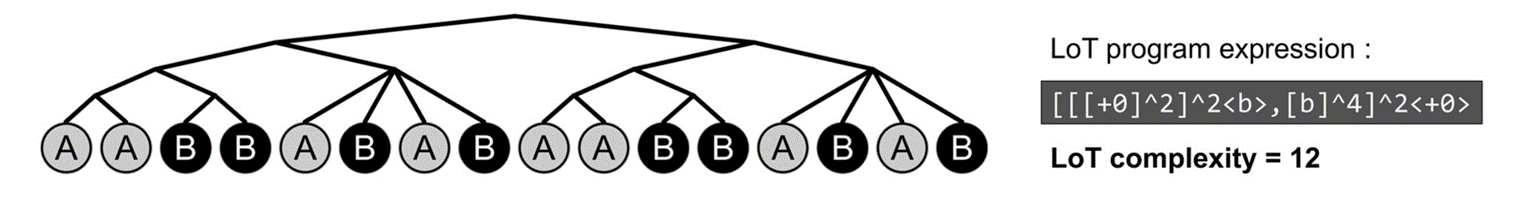
    
> __**AIMS**__ 
> - Write the grammar described in the paper
> - Define the appropriate Hypothesis class in LOTlib3
> - Run inference on _partial_ sequences
>     - e.g., we only see the first few elements of the sequence and we have to guess the rest
> - Run inference on _noisy_ sequences
>     - e.g., we see the full sequence, but some elements might have been switched